# Práctica 7a: análisis de regresión lineal simple

El Análisis de Regresión nos permite descubrir si existe una relación entre una/s variable/s independiente/s y una variable dependiente (el objetivo). Por ejemplo, en una Regresión Lineal Simple queremos saber si hay una relación entre $x$ y $y$. Esto es muy útil en la predicción (por ejemplo, hacia dónde se dirige la tendencia) y en la modelización de series temporales (por ejemplo, niveles de temperatura por año y si el calentamiento global es cierto).

In [1]:
# Importing the libraries 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = '../../pmsm_temperature_data.csv'
df = pd.read_csv(file)
names =["stator_tooth", "pm"]
df = df[names]
df

,stator_tooth,pm
0,-2.066143,-2.522071
1,-2.064859,-2.522418
2,-2.064073,-2.522673
3,-2.063137,-2.521639
4,-2.062795,-2.521900
...,...,...
998065,0.836084,0.429853
998066,0.834438,0.429751
998067,0.833936,0.429439
998068,0.830504,0.429558


In [3]:
# Definimos quién es X y quién y
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

El objetivo general aquí es crear un modelo que prediga el salario basado en los años de experiencia. En primer lugar, crearemos un modelo utilizando el conjunto de entrenamiento (70% del conjunto de datos). Luego se ajustará a una línea que se aproxime lo más posible a la mayoría de los puntos de datos.

In [4]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 123)

In [5]:
# Fitting Simple Linear Regression to the Training set 
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Predicting the Test set results 
y_pred = model.predict(X_test)
print ("Desempeño del modelo: ", model.score(X_test, y_test))

Desempeño del modelo:  0.5881808190798092


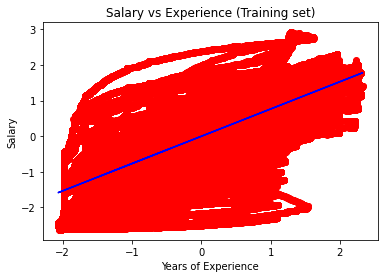

In [7]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_train, model.predict(X_train), color = 'blue') 
plt.title('Salary vs Experience (Training set)') 
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

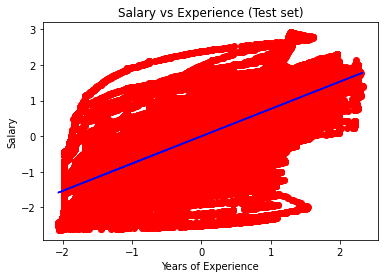

In [8]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# K-Folds Cross Validation
En la validación cruzada de K-Folds dividimos nuestros datos en k diferentes subconjuntos (o volúmenes). Utilizamos subconjuntos $k-$1 para entrenar nuestros datos y dejamos el último subconjunto (o el último pliegue) como datos de prueba. Luego promediamos el modelo contra cada uno de los pliegues y luego finalizamos nuestro modelo. Después de eso lo probamos contra el conjunto de prueba.

In [9]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=123)
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
print("Desepeño de cross-validation con 5 volúmenes:", cv_scores.mean())

Desepeño de cross-validation con 5 volúmenes: 0.5910878168693364
